# <div align="center"> SPECIAL TOPICS III </div>
## <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 10 - Deep Learning</div>
<div align="center"> Fabien Forge, (he/him)</div>

# Road Map
$$y=f(X) + \varepsilon$$
- Today is the last day we will learn about a new technique
- Deep learning (DL) is the technique behind most of artificial intelligence innovation in recent years
    - self-driving cars
    - image recognition
    - deep fakes etc.
- This lecture will not use the Introduction to Statistical Learning with Examples in R book
    - The second edition programmed to be released in May will include a chapter about deep learning
    - I will instead use the fairly technical book [_Deep Learning_](https://www.deeplearningbook.org/)  by [Ian Goodfellow](https://en.wikipedia.org/wiki/Ian_Goodfellow) and the terrific [Kaggle tutorial](https://www.kaggle.com/learn/intro-to-deep-learning)
- Why was it not there in the first edition? Because predictive power of DL is at the expense of interpretation 
    - We know it's working but we are not sure what's going on deep inside

## What's deep in DL?
$$y=f(X) + \varepsilon$$
- So far we have used many methods to approximate the true function, let's call it $f^\ast(x)$ relating X to y
- Deep learning does it too but in the following way:
$$f^\ast(x)= f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

- These chain structures are the most commonly used structures of __neural networks__. 
    - $f^{(1)}$ is called the first __layer__ of the network
    - $f^{(2)}$ is called the second layer, and so on.

## What is Deep Learning?

- Deep learning is an approach to machine learning characterized by deep stacks of computations. 
- This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.
- It is loosely based on the way neurones are activated and working together in the brain

# What's a neuron in neural network?
- Let's start with a familiar example represented in the deep learning framework
- How should think of a (single) __neuron__ the individual neuron. 
- As a diagram, a neuron (or **unit**) with one input looks like:
![](https://i.imgur.com/mfOlDR6.png)

## Linear regression and Linear unit
- The Linear Unit is the previous slide can be represented by a very familiar function: 
    -  y = w x + b 
- This is obviously the equation of a line:
     - w is called a __weight__ whose OLS equivalent is the slope $\beta$
     - b is called a __bias__ (sorry! not my fault) and corresponds to the intercept $\alpha$

## Exemple - Cereal Dataset
- Let's use the [80-cereals](https://www.kaggle.com/crawford/80-cereals) from Kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folderPath="/content/drive/MyDrive/class 10 - deep learning/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv(folderPath+"cereal.csv")
display(df.info())
display(df.describe().T)
display(df.head().append(df.tail()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


None

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [ ]:
#sns.pairplot(df)

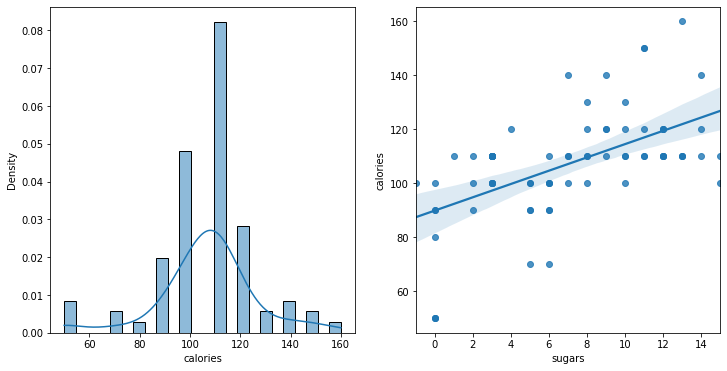

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.histplot(x="calories",kde=True, stat='density',data=df, ax=axes[0])
sns.regplot(x='sugars',y='calories',x_ci="sd",data=df, ax=axes[1])

plt.show()

# Linear unit continued
- The power of DL is to use a network of neurons, not just the one
- But building a single neuron models allows us to realize that this is an object we are familiar with:
    - A single neuron model is equivalent to a linear model

In [ ]:
import statsmodels as sm
import statsmodels.formula.api as smf
mod=smf.ols("calories~sugars", data=df)
res=mod.fit()

print(res.summary())
print(res.params)
print(f"\nPredicted Calories for Sugar content of 5 is b={round(res.params['Intercept'])} + w={round(res.params['sugars'],1)} *X = {round(res.params['Intercept']) + (5*round(res.params['sugars'],1))}")

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     34.69
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.02e-07
Time:                        19:27:04   Log-Likelihood:                -322.78
No. Observations:                  77   AIC:                             649.6
Df Residuals:                      75   BIC:                             654.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.8201      3.437     26.137      0.0

<figure style="padding: 1em;">
<img src="https://i.imgur.com/yjsfFvY.png" width="1000" alt="Computing with the linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>Computing with the linear unit.
</center></figcaption>
</figure>

And, checking against our formula, we have $calories = 2.5 \times 5 + 90 = 102.5$, just like we expect.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# For details on this colde: https://www.tensorflow.org/tutorials/keras/regression
# normalization
normalizer = preprocessing.Normalization(input_shape=[1,])
normalizer.adapt(np.array(df['sugars']))
print(normalizer.mean.numpy())

# define the model architecture: a network with 1 linear unit



model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

model.summary()


[6.922078]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# This model will predict Calories from Sugar.
# Run the untrained model on the first 10 sugar values. The output won't be good, but you'll see that it has the expected shape, (10,1):
print(model.predict(df.loc[:10,'sugars']))
print(model.weights)

[[-0.25226623]
 [ 0.29490265]
 [-0.52585065]
 [-1.8937728 ]
 [ 0.29490265]
 [ 0.84207153]
 [ 1.9364092 ]
 [ 0.29490265]
 [-0.25226623]
 [-0.52585065]
 [ 1.3892404 ]]
[<tf.Variable 'mean:0' shape=(1,) dtype=float32, numpy=array([6.922078], dtype=float32)>, <tf.Variable 'variance:0' shape=(1,) dtype=float32, numpy=array([19.500422], dtype=float32)>, <tf.Variable 'count:0' shape=() dtype=int64, numpy=77>, <tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.2081293]], dtype=float32)>, <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [ ]:
#Once the model is built, configure the training procedure using the Model.compile() method. 
# The most important arguments to compile are the loss and the optimizer since these define what will be optimized (mean_absolute_error) and how (using the optimizers.Adam).
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error')

In [ ]:
history = model.fit(
    df['sugars'], df['calories'],
    epochs=500,
    verbose=0,# suppress logging
    validation_split = 0.2 # Calculate validation results on 20% of the training data
    )

In [ ]:
print(model.predict(x=[5]))
print(model.weights)

[[103.79592]]
[<tf.Variable 'mean:0' shape=(1,) dtype=float32, numpy=array([6.922078], dtype=float32)>, <tf.Variable 'variance:0' shape=(1,) dtype=float32, numpy=array([19.500422], dtype=float32)>, <tf.Variable 'count:0' shape=() dtype=int64, numpy=77>, <tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[5.5350146]], dtype=float32)>, <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([106.20509], dtype=float32)>]


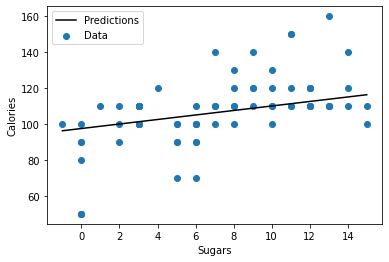

In [ ]:
x = tf.linspace(df['sugars'].min(), df['sugars'].max(), 100)
y = model.predict(x)

def plot_sugars(x, y):
  plt.scatter(df['sugars'], df['calories'], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Sugars')
  plt.ylabel('Calories')
  plt.legend()

plot_sugars(x,y)

## Multiple Inputs 

- What's the equivalent for a multiple regression model?
- You can simply add more input __connections__ to the neuron, one for each additional feature. 
- The formula for this neuron would take the also familiar functional form:
  - $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$

<figure style="padding: 1em;">
<img src="https://i.imgur.com/vyXSnlZ.png" width="300" alt="Three input connections: x0, x1, and x2, along with the bias.">

</figure>


In [ ]:

mod=smf.ols("calories~sugars + fiber + protein", data=df)
res=mod.fit()

print(res.summary())
print(res.params)
# print(f"\nPredicted Calories for the 3 inputs {} Sugar content of 5 is b={round(res.params['Intercept'])} + w={round(res.params['sugars'],1)} *X = {round(res.params['Intercept']) + (5*round(res.params['sugars'],1))}")

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     24.13
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           5.90e-11
Time:                        19:27:18   Log-Likelihood:                -310.89
No. Observations:                  77   AIC:                             629.8
Df Residuals:                      73   BIC:                             639.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.5021      5.731     12.999      0.0

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(df[['sugars' , 'fiber' , 'protein']]))

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

print(linear_model.predict(df.loc[:10,['sugars' , 'fiber' , 'protein']]))

[[ 0.6192108 ]
 [-0.0912965 ]
 [ 0.09455258]
 [-0.00635725]
 [ 0.4190227 ]
 [ 1.0899819 ]
 [ 2.053543  ]
 [-0.0912965 ]
 [ 0.63089687]
 [-0.1518424 ]
 [ 2.0190222 ]]


When you call the model it's weight matrices will be built. Now you can see that the `'kernel' (the $w$ in $y=wx+b$  ) has a shape of (3,1).

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_6/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.2029876 ],
       [ 0.5972587 ],
       [-0.82940114]], dtype=float32)>

In [ ]:
# Use the same compile and fit calls as for the single input horsepower model:
# compile
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error')
# fit
history = linear_model.fit(
    df[['sugars' , 'fiber' , 'protein']], df['calories'], 
    epochs=500,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

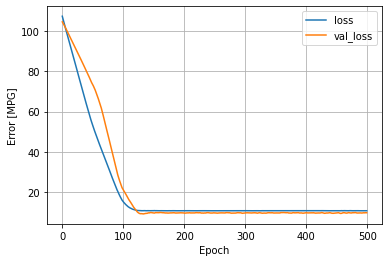

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
df[['calories','sugars','fiber','protein']].head()

,calories,sugars,fiber,protein
0,70,6,10.0,4
1,120,8,2.0,3
2,70,5,9.0,4
3,50,0,14.0,4
4,110,8,1.0,2


In [ ]:
linear_model.weights # neuron weights

[<tf.Variable 'mean:0' shape=(3,) dtype=float32, numpy=array([6.922078 , 2.151948 , 2.5454545], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(3,) dtype=float32, numpy=array([19.500422 ,  5.6066523,  1.1829988], dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=77>,
 <tf.Variable 'dense_6/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[13.50263 ],
        [-9.433525],
        [ 8.945191]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([105.72167], dtype=float32)>]

In [ ]:
res.params #ols parameters

Intercept    74.502120
sugars        2.844335
fiber        -3.469752
protein       7.919613
dtype: float64

# Layers #

- The strength of neural networks reside not in a single neuron but in the __modularity__ offered by multiple neurons
- To achieve this, neurons are organized in **layers** that are inter-connected
  - We talk about  __dense__ layers when linear units have in common the same set of inputs
- The figure below represents a _single layer_ composed of two units
  - The number of units in a given layer gives the __width__ of the model

<figure style="padding: 1em;">
<img src="https://i.imgur.com/2MA4iMV.png" width="300" alt="A stack of three circles in an input layer connected to two circles in a dense layer.">
<figcaption style="textalign: center; font-style: italic"><center>A dense layer of two linear units receiving two inputs and a bias.
</center></figcaption>
</figure>

- It turns out that combining dense layers is not enough to obtain the _flexibility_ that makes neural networks so powerful
  - You could think of each layer in a neural network as performing some kind of relatively simple transformation. 



# The Activation Function #

- It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. 
- Dense layers by themselves can never move us out of the world of lines and planes. 
- What we need is something *nonlinear* which is what __activation functions__ are for.


- An **activation function** is a function applied to each of a layer's outputs (its *activations*). 
- The most common is the *rectifier* function $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/aeIyAlF.png" width="400" alt="A graph of the rectifier function. The line y=x when x>0 and y=0 when x<0, making a 'hinge' shape like '_/'.">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

- Applying the function to the outputs of a neuron will put a *bend* in the data, moving us away from simple lines.

- When we attach the rectifier to a linear unit, we get a **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".)  
- Applying a ReLU activation to a linear unit means the output becomes `max(0, w * x + b)`, which we might draw in a diagram like:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eFry7Yu.png" width="250" alt="Diagram of a single ReLU. Like a linear unit, but instead of a '+' symbol we now have a hinge '_/'. ">
<figcaption style="textalign: center; font-style: italic"><center>A rectified linear unit.
</center></figcaption>
</figure>

# Stacking Dense Layers #

- Neural networks can be represented as follows:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/Y5iwFQZ.png" width="450" alt="An input layer, two hidden layers, and a final linear layer.">
<figcaption style="textalign: center; font-style: italic"><center>A stack of dense layers makes a "fully-connected" network.
</center></figcaption>
</figure>

- The layers before the output layer are sometimes called **hidden** since we never see their outputs directly.

- Note that the final (output) layer is a _linear unit_ (not ReLU). 
- That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. 
  - Other tasks (like classification) might require an activation function on the output.


## New data

[The Auto MPG dataset](https://archive.ics.uci.edu/ml/index.php) which is also used in this [Tensorflow tutorial](https://www.tensorflow.org/tutorials/) keras/regression.

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# Data Prepocessing
dataset = raw_dataset.copy()
# remove missings
display(dataset.isna().sum()) # show number of missings
dataset = dataset.dropna() # drop missing

# Create dummies
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.append(dataset.tail())

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


Now split the dataset into a training set and a test set.

Use the test set in the final evaluation of our models.

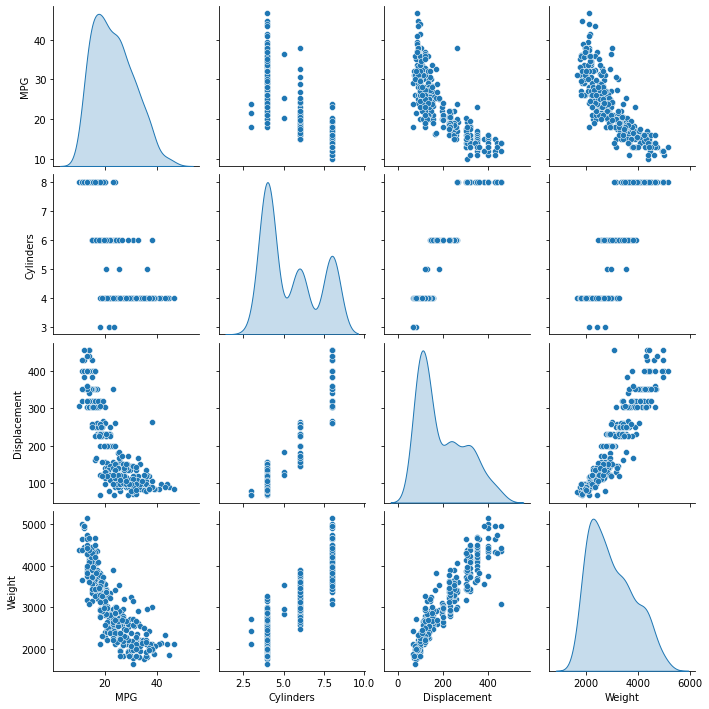

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Visualize training data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')


In [ ]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


### Split features from labels
Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.




In [ ]:
train_features = train_dataset.copy() #copy data frame - train
test_features = test_dataset.copy() #copy data frame - test

train_labels = train_features.pop('MPG') # remove MPG from train_features and put it in train_labels
test_labels = test_features.pop('MPG') # remove MPG from test_features and put it in train_labels

Normalization

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

# When the layer is called it returns the input data, with each feature independently normalized:
print(normalizer.mean.numpy())
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print('\nNormalized:', normalizer(first).numpy())

[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
 7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]
First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [ ]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_8 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
horsepower_model.predict(horsepower[:10])

array([[-0.49255875],
       [-0.2781836 ],
       [ 0.9091249 ],
       [-0.69044346],
       [-0.6244819 ],
       [-0.2452028 ],
       [-0.7399147 ],
       [-0.6244819 ],
       [-0.16275083],
       [-0.2781836 ]], dtype=float32)

In [ ]:
# Once the model is built, configure the training procedure using the Model.compile() method. 
# The most important arguments to compile are the loss and the optimizer since these define what will be optimized (mean_absolute_error) and how (using the optimizers.Adam).
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
# Once the training is configured, use Model.fit() to execute the training:
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

# Visualize the model's training progress using the stats stored in the history object.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.803458,4.207133,95
96,3.803101,4.188003,96
97,3.802949,4.184785,97
98,3.803454,4.202597,98
99,3.808439,4.213585,99


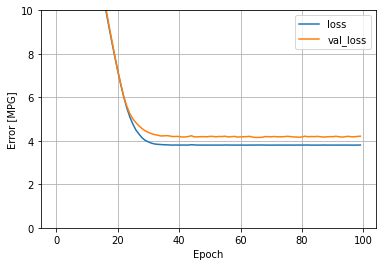

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [ ]:
test_results

{'horsepower_model': 3.6422107219696045}

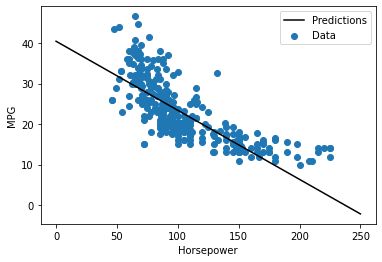

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
plot_horsepower(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


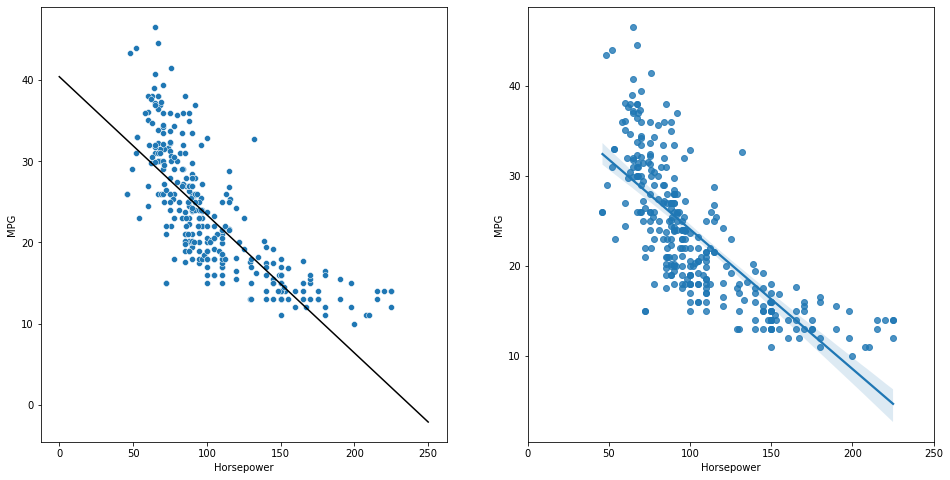

In [ ]:
fig, axes=plt.subplots(1,2, figsize=(16,8))

sns.scatterplot(train_features['Horsepower'], train_labels, ax=axes[0])
axes[0].plot(x, y, color='k')
sns.regplot(x=train_features['Horsepower'], y=train_labels, ax=axes[1])
axes[1].set_xlim(0,250)
plt.show()

# Multiple inputs - 1 unit
You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same  except that  is a matrix and  is a vector.

This time use the Normalization layer that was adapted to the whole dataset.

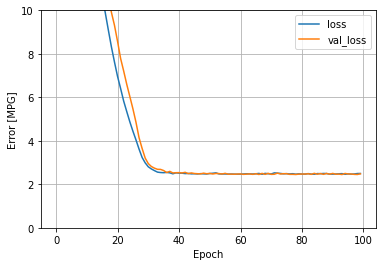

In [ ]:
# create the model - same as before
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

# compile the model - same as before
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# Train the model
history = linear_model.fit(
    train_features, train_labels, # train_features now contains all features, not just 1
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

# keep test_results
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# plot history
plot_loss(history)

# Multiple inputs - 2 units
Still single layer


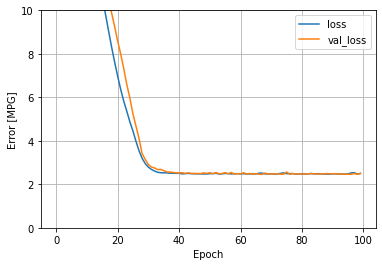

In [ ]:
# create the model - different from before
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=2) # 2 units instead of 1
])

# compile the model - same as before
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# Train the model
history2 = linear_model.fit(
    train_features, train_labels, # train_features now contains all features, not just 1
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

# keep test_results
test_results['linear_model_2units'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# plot history
plot_loss(history2)

# A Deep Neural Network regression
The previous section implemented linear models for single and multiple inputs.

This section implements single-input and multiple-input DNN models. The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

The normalization layer.

Two hidden, nonlinear, Dense layers using the relu nonlinearity.
A linear single-output layer.

Both will use the same training procedure so the compile method is included in the build_and_compile_model function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'), # 64 units and relu activation function
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### One variable - 2 hidden layers, 64 units each

Start with a DNN model for a single input: "Horsepower"

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_8 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


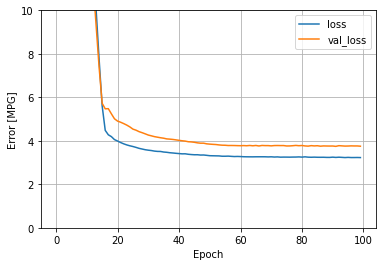

In [ ]:
# train the model
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

plot_loss(history)

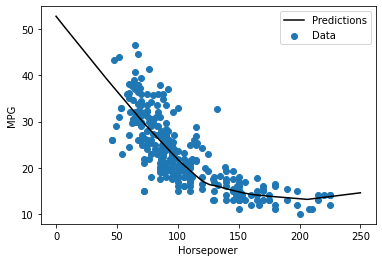

In [ ]:
# Plot goodness of fit
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

plot_horsepower(x, y)

### All variables - 2 hidden layers, 64 units each

If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_7 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_15 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


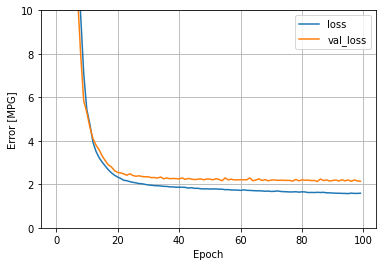

In [ ]:
# train the model
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
plot_loss(history)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.642211
linear_model_2units,2.524594
dnn_horsepower_model,2.877396
dnn_model,1.737107


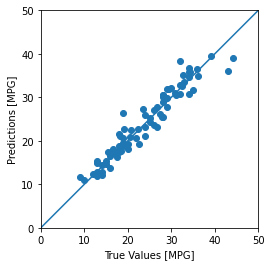

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

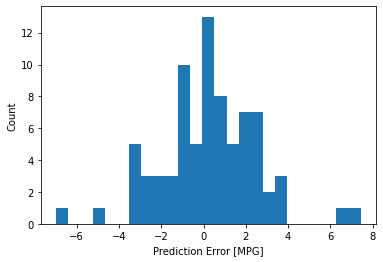

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')